Title: 
Group Members:
Data: 
Question:
Ai Interpretation

# Water Quality Analysis

## Group Project By Aiden Lilley & Owen Johnson 

Water quality data was collected from Data.GOV. The data was collected by volunteers once every two weeks. Some of the measurements include turbidity, pH, Dissolved Oxygen, Salinity and Temperature. 

Questions we wanted to answer: is their evidence climate change witihn region by looking at the change in air temperature and water temperature over time? and lastly, how healthy is the ecosystem given certain parameters? 

In [1]:
import warnings 
warnings.simplefilter('ignore')

import pandas as pd 

df = pd.read_csv('s3://ia340-2024fall-2-5853709/BKB_WaterQualityData_2020084.csv')
df.head()

,Site_Id,Unit_Id,Read_Date,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp-Celsius,Air Temp (?F),Time (24:00),Field_Tech,DateVerified,WhoVerified,AirTemp (C),Year
0,Bay,NaN,1/3/1994,1.3,11.7,7.3,0.40,0.40,5.9,8.0,46.40,11:00,NaN,NaN,NaN,8.0,1994
1,Bay,NaN,1/31/1994,1.5,12.0,7.4,0.20,0.35,3.0,2.6,36.68,11:30,NaN,NaN,NaN,2.6,1994
2,Bay,NaN,2/7/1994,1.0,10.5,7.2,0.25,0.60,5.9,7.6,45.68,9:45,NaN,NaN,NaN,7.6,1994
3,Bay,NaN,2/23/1994,1.0,10.1,7.4,0.35,0.50,10.0,2.7,36.86,NaN,NaN,NaN,NaN,2.7,1994
4,Bay,NaN,2/28/1994,1.0,12.6,7.2,0.20,0.40,1.6,0.0,32.00,10:30,NaN,NaN,NaN,0.0,1994


In [2]:
df.shape #2371 Rows, 17 Columns

(2371, 17)

In [3]:
df.info()
# Can maybe get rid of DateVerified, WhoVerified, and Convert the Water Temp from F to C also remove air temp-celsius and Unit ID
# Also change Site_ID so that it is normal 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2371 entries, 0 to 2370
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Site_Id                  2370 non-null   object 
 1   Unit_Id                  32 non-null     object 
 2   Read_Date                2366 non-null   object 
 3   Salinity (ppt)           2241 non-null   float64
 4   Dissolved Oxygen (mg/L)  1520 non-null   float64
 5   pH (standard units)      2276 non-null   float64
 6   Secchi Depth (m)         2298 non-null   float64
 7   Water Depth (m)          2300 non-null   float64
 8   Water Temp (?C)          2250 non-null   float64
 9   Air Temp-Celsius         85 non-null     float64
 10  Air Temp (?F)            2300 non-null   float64
 11  Time (24:00)             2308 non-null   object 
 12  Field_Tech               2332 non-null   object 
 13  DateVerified             453 non-null    object 
 14  WhoVerified             

In [4]:
for col in df.columns:
    print(col)

Site_Id
Unit_Id
Read_Date
Salinity (ppt)
Dissolved Oxygen (mg/L)
pH (standard units)
Secchi Depth (m)
Water Depth (m)
Water Temp (?C)
Air Temp-Celsius
Air Temp (?F)
Time (24:00)
Field_Tech
DateVerified
WhoVerified
AirTemp (C)
Year


In [5]:
df_dropped = df.drop(columns = ['WhoVerified', 'DateVerified', 'Air Temp (?F)', 'Unit_Id', 'Air Temp-Celsius'])
for col in df_dropped.columns: 
    print(col)

Site_Id
Read_Date
Salinity (ppt)
Dissolved Oxygen (mg/L)
pH (standard units)
Secchi Depth (m)
Water Depth (m)
Water Temp (?C)
Time (24:00)
Field_Tech
AirTemp (C)
Year


In [6]:
df_dropped.isnull().sum()
df_dropped = df_dropped.dropna()

In [7]:
df_dropped.isnull().sum()

Site_Id                    0
Read_Date                  0
Salinity (ppt)             0
Dissolved Oxygen (mg/L)    0
pH (standard units)        0
Secchi Depth (m)           0
Water Depth (m)            0
Water Temp (?C)            0
Time (24:00)               0
Field_Tech                 0
AirTemp (C)                0
Year                       0
dtype: int64

In [8]:
df_dropped.describe()

,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),AirTemp (C),Year
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1257.00000
mean,0.898998,6.662546,7.182856,0.504403,0.751627,17.981551,15.603873,2005.55529
std,1.383695,2.495832,0.793052,0.486632,0.585866,8.301469,10.248445,7.96711
min,0.000000,0.000000,0.300000,0.000000,0.010000,0.000000,-17.777778,1990.00000
25%,0.000000,4.800000,6.500000,0.300000,0.400000,11.000000,8.888889,2000.00000
50%,0.000000,6.500000,7.000000,0.400000,0.680000,18.000000,16.666667,2006.00000
75%,1.500000,8.500000,7.500000,0.600000,0.900000,25.000000,23.888889,2012.00000
max,9.000000,15.100000,9.900000,7.400000,7.500000,74.000000,33.500000,2019.00000


In [9]:
# Lab 6 Section of the Lab 

In [10]:
pip install jupyter-ai~=1.0

  Using cached aiosqlite-0.20.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached jupyterlab-3.6.8-py3-none-any.whl.metadata (12 kB)
  Using cached packaging-24.1-py3-none-any.whl.metadata (3.2 kB)
  Using cached jupyter_ydoc-0.2.5-py3-none-any.whl.metadata (2.2 kB)
  Using cached jupyter_server_ydoc-0.8.0-py3-none-any.whl.metadata (5.3 kB)
  Using cached nbclassic-1.1.0-py3-none-any.whl.metadata (3.6 kB)
  Using cached notebook-6.5.7-py3-none-any.whl.metadata (2.5 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 4.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached jupyter_server_fileid-0.9.3-py3-none-any.whl.metadata (4.7 kB)
  Using cached ypy_websocket-0.8.4-py3-none-any.whl.metadata (2.5 kB)
  Using cached y_py-0.6.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3

In [11]:
pip install jupyter-ai[all]

INFO: pip is looking at multiple versions of langchain-anthropic to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of langchain-aws to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of langchain-cohere to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of langchain-google-genai to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of langchain-mistralai to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of langchain-nvidia-ai-endpoints to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of langchain-ollam

In [12]:
import boto3 
from botocore.exceptions import ClientError
import json

def get_secret(secret_name):
    region_name = "us-east-1"

    # Create a Secrets Manager client
    session = boto3.session.Session()
    client = session.client(
        service_name='secretsmanager',
        region_name=region_name
    )

    try:
        get_secret_value_response = client.get_secret_value(
            SecretId=secret_name
        )
    except ClientError as e:
        raise e

    secret = get_secret_value_response['SecretString']
    
    return json.loads(secret)

In [13]:
import os
os.environ["OPENAI_API_KEY"] = get_secret('openai')['api_key']

In [14]:
%load_ext jupyter_ai_magics

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


In [15]:
%ai list

| Provider | Environment variable | Set? | Models |
|----------|----------------------|------|--------|
| `ai21` | `AI21_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`ai21:j1-large`</li><li>`ai21:j1-grande`</li><li>`ai21:j1-jumbo`</li><li>`ai21:j1-grande-instruct`</li><li>`ai21:j2-large`</li><li>`ai21:j2-grande`</li><li>`ai21:j2-jumbo`</li><li>`ai21:j2-grande-instruct`</li><li>`ai21:j2-jumbo-instruct`</li></ul> |
| `bedrock` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | <ul><li>`bedrock:amazon.titan-text-express-v1`</li><li>`bedrock:amazon.titan-text-lite-v1`</li><li>`bedrock:amazon.titan-text-premier-v1:0`</li><li>`bedrock:ai21.j2-ultra-v1`</li><li>`bedrock:ai21.j2-mid-v1`</li><li>`bedrock:ai21.jamba-instruct-v1:0`</li><li>`bedrock:cohere.command-light-text-v14`</li><li>`bedrock:cohere.command-text-v14`</li><li>`bedrock:cohere.command-r-v1:0`</li><li>`bedrock:cohere.command-r-plus-v1:0`</li><li>`bedrock:meta.llama2-13b-chat-v1`</li><li>`bedrock:meta.llama2-70b-chat-v1`</li><li>`bedrock:meta.llama3-8b-instruct-v1:0`</li><li>`bedrock:meta.llama3-70b-instruct-v1:0`</li><li>`bedrock:meta.llama3-1-8b-instruct-v1:0`</li><li>`bedrock:meta.llama3-1-70b-instruct-v1:0`</li><li>`bedrock:meta.llama3-1-405b-instruct-v1:0`</li><li>`bedrock:mistral.mistral-7b-instruct-v0:2`</li><li>`bedrock:mistral.mixtral-8x7b-instruct-v0:1`</li><li>`bedrock:mistral.mistral-large-2402-v1:0`</li><li>`bedrock:mistral.mistral-large-2407-v1:0`</li></ul> |
| `bedrock-chat` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | <ul><li>`bedrock-chat:amazon.titan-text-express-v1`</li><li>`bedrock-chat:amazon.titan-text-lite-v1`</li><li>`bedrock-chat:amazon.titan-text-premier-v1:0`</li><li>`bedrock-chat:anthropic.claude-v2`</li><li>`bedrock-chat:anthropic.claude-v2:1`</li><li>`bedrock-chat:anthropic.claude-instant-v1`</li><li>`bedrock-chat:anthropic.claude-3-sonnet-20240229-v1:0`</li><li>`bedrock-chat:anthropic.claude-3-haiku-20240307-v1:0`</li><li>`bedrock-chat:anthropic.claude-3-opus-20240229-v1:0`</li><li>`bedrock-chat:anthropic.claude-3-5-sonnet-20240620-v1:0`</li><li>`bedrock-chat:meta.llama2-13b-chat-v1`</li><li>`bedrock-chat:meta.llama2-70b-chat-v1`</li><li>`bedrock-chat:meta.llama3-8b-instruct-v1:0`</li><li>`bedrock-chat:meta.llama3-70b-instruct-v1:0`</li><li>`bedrock-chat:meta.llama3-1-8b-instruct-v1:0`</li><li>`bedrock-chat:meta.llama3-1-70b-instruct-v1:0`</li><li>`bedrock-chat:meta.llama3-1-405b-instruct-v1:0`</li><li>`bedrock-chat:mistral.mistral-7b-instruct-v0:2`</li><li>`bedrock-chat:mistral.mixtral-8x7b-instruct-v0:1`</li><li>`bedrock-chat:mistral.mistral-large-2402-v1:0`</li><li>`bedrock-chat:mistral.mistral-large-2407-v1:0`</li></ul> |
| `bedrock-custom` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | Specify the ARN (Amazon Resource Name) of the custom/provisioned model as the model ID. For more information, see the [Amazon Bedrock model IDs documentation](https://docs.aws.amazon.com/bedrock/latest/userguide/model-ids.html).

The model provider must also be specified below. This is the provider of your foundation model *in lowercase*, e.g. `amazon`, `anthropic`, `meta`, or `mistral`. |
| `anthropic` | `ANTHROPIC_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`anthropic:claude-v1`</li><li>`anthropic:claude-v1.0`</li><li>`anthropic:claude-v1.2`</li><li>`anthropic:claude-2`</li><li>`anthropic:claude-2.0`</li><li>`anthropic:claude-instant-v1`</li><li>`anthropic:claude-instant-v1.0`</li><li>`anthropic:claude-instant-v1.2`</li></ul> |
| `anthropic-chat` | `ANTHROPIC_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`anthropic-chat:claude-2.0`</li><li>`anthropic-chat:claude-2.1`</li><li>`anthropic-chat:claude-instant-1.2`</li><li>`anthropic-chat:claude-3-opus-20240229`</li><li>`anthropic-chat:claude-3-sonnet-20240229`</li><li>`anthropic-chat:claude-3-haiku-20240307`</li><li>`anthropic-chat:claude-3-5-sonnet-20240620`</li></ul> |
| `azure-chat-openai` | `AZURE_OPENAI_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | This provider does not define a list of models. |
| `cohere` | `COHERE_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`cohere:command`</li><li>`cohere:command-nightly`</li><li>`cohere:command-light`</li><li>`cohere:command-light-nightly`</li><li>`cohere:command-r-plus`</li><li>`cohere:command-r`</li></ul> |
| `gemini` | `GOOGLE_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`gemini:gemini-1.5-pro`</li><li>`gemini:gemini-1.5-flash`</li><li>`gemini:gemini-1.0-pro`</li><li>`gemini:gemini-1.0-pro-001`</li><li>`gemini:gemini-1.0-pro-latest`</li><li>`gemini:gemini-1.0-pro-vision-latest`</li><li>`gemini:gemini-pro`</li><li>`gemini:gemini-pro-vision`</li></ul> |
| `gpt4all` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | <ul><li>`gpt4all:ggml-gpt4all-j-v1.2-jazzy`</li><li>`gpt4all:ggml-gpt4all-j-v1.3-groovy`</li><li>`gpt4all:ggml-gpt4all-l13b-snoozy`</li><li>`gpt4all:mistral-7b-openorca.Q4_0`</li><li>`gpt4all:mistral-7b-instruct-v0.1.Q4_0`</li><li>`gpt4all:gpt4all-falcon-q4_0`</li><li>`gpt4all:wizardlm-13b-v1.2.Q4_0`</li><li>`gpt4all:nous-hermes-llama2-13b.Q4_0`</li><li>`gpt4all:gpt4all-13b-snoozy-q4_0`</li><li>`gpt4all:mpt-7b-chat-merges-q4_0`</li><li>`gpt4all:orca-mini-3b-gguf2-q4_0`</li><li>`gpt4all:starcoder-q4_0`</li><li>`gpt4all:rift-coder-v0-7b-q4_0`</li><li>`gpt4all:em_german_mistral_v01.Q4_0`</li></ul> |
| `huggingface_hub` | `HUGGINGFACEHUB_API_TOKEN` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | See [https://huggingface.co/models](https://huggingface.co/models) for a list of models. Pass a model's repository ID as the model ID; for example, `huggingface_hub:ExampleOwner/example-model`. |
| `mistralai` | `MISTRAL_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`mistralai:open-mistral-7b`</li><li>`mistralai:open-mixtral-8x7b`</li><li>`mistralai:open-mixtral-8x22b`</li><li>`mistralai:mistral-small-latest`</li><li>`mistralai:mistral-medium-latest`</li><li>`mistralai:mistral-large-latest`</li><li>`mistralai:codestral-latest`</li></ul> |
| `nvidia-chat` | `NVIDIA_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`nvidia-chat:playground_llama2_70b`</li><li>`nvidia-chat:playground_nemotron_steerlm_8b`</li><li>`nvidia-chat:playground_mistral_7b`</li><li>`nvidia-chat:playground_nv_llama2_rlhf_70b`</li><li>`nvidia-chat:playground_llama2_13b`</li><li>`nvidia-chat:playground_steerlm_llama_70b`</li><li>`nvidia-chat:playground_llama2_code_13b`</li><li>`nvidia-chat:playground_yi_34b`</li><li>`nvidia-chat:playground_mixtral_8x7b`</li><li>`nvidia-chat:playground_neva_22b`</li><li>`nvidia-chat:playground_llama2_code_34b`</li></ul> |
| `ollama` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | See [https://www.ollama.com/library](https://www.ollama.com/library) for a list of models. Pass a model's name; for example, `deepseek-coder-v2`. |
| `openai` | `OPENAI_API_KEY` | <abbr title="You have set this environment variable, so you can use this provider's models.">✅</abbr> | <ul><li>`openai:babbage-002`</li><li>`openai:davinci-002`</li><li>`openai:gpt-3.5-turbo-instruct`</li></ul> |
| `openai-chat` | `OPENAI_API_KEY` | <abbr title="You have set this environment variable, so you can use this provider's models.">✅</abbr> | <ul><li>`openai-chat:gpt-3.5-turbo`</li><li>`openai-chat:gpt-3.5-turbo-0125`</li><li>`openai-chat:gpt-3.5-turbo-0301`</li><li>`openai-chat:gpt-3.5-turbo-0613`</li><li>`openai-chat:gpt-3.5-turbo-1106`</li><li>`openai-chat:gpt-3.5-turbo-16k`</li><li>`openai-chat:gpt-3.5-turbo-16k-0613`</li><li>`openai-chat:gpt-4`</li><li>`openai-chat:gpt-4-turbo`</li><li>`openai-chat:gpt-4-turbo-preview`</li><li>`openai-chat:gpt-4-0613`</li><li>`openai-chat:gpt-4-32k`</li><li>`openai-chat:gpt-4-32k-0613`</li><li>`openai-chat:gpt-4-0125-preview`</li><li>`openai-chat:gpt-4-1106-preview`</li><li>`openai-chat:gpt-4o`</li><li>`openai-chat:gpt-4o-mini`</li></ul> |
| `openrouter` | `OPENROUTER_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | This provider does not define a list of models. |
| `qianfan` | `QIANFAN_AK`, `QIANFAN_SK` | <abbr title="You have not set all of these environment variables, so you cannot use this provider's models.">❌</abbr> | <ul><li>`qianfan:ERNIE-Bot`</li><li>`qianfan:ERNIE-Bot-4`</li></ul> |
| `sagemaker-endpoint` | Not applicable. | <abbr title="Not applicable">N/A</abbr> | Specify an endpoint name as the model ID. In addition, you must specify a region name, request schema, and response path. For more information, see the documentation about [SageMaker endpoints deployment](https://docs.aws.amazon.com/sagemaker/latest/dg/realtime-endpoints-deploy-models.html) and about [using magic commands with SageMaker endpoints](https://jupyter-ai.readthedocs.io/en/latest/users/index.html#using-magic-commands-with-sagemaker-endpoints). |
| `togetherai` | `TOGETHER_API_KEY` | <abbr title="You have not set this environment variable, so you cannot use this provider's models.">❌</abbr> | <ul><li>`togetherai:Austism/chronos-hermes-13b`</li><li>`togetherai:DiscoResearch/DiscoLM-mixtral-8x7b-v2`</li><li>`togetherai:EleutherAI/llemma_7b`</li><li>`togetherai:Gryphe/MythoMax-L2-13b`</li><li>`togetherai:Meta-Llama/Llama-Guard-7b`</li><li>`togetherai:Nexusflow/NexusRaven-V2-13B`</li><li>`togetherai:NousResearch/Nous-Capybara-7B-V1p9`</li><li>`togetherai:NousResearch/Nous-Hermes-2-Yi-34B`</li><li>`togetherai:NousResearch/Nous-Hermes-Llama2-13b`</li><li>`togetherai:NousResearch/Nous-Hermes-Llama2-70b`</li></ul> |

Aliases and custom commands:

| Name | Target |
|------|--------|
| `gpt2` | `huggingface_hub:gpt2` |
| `gpt3` | `openai:davinci-002` |
| `chatgpt` | `openai-chat:gpt-3.5-turbo` |
| `gpt4` | `openai-chat:gpt-4` |
| `ernie-bot` | `qianfan:ERNIE-Bot` |
| `ernie-bot-4` | `qianfan:ERNIE-Bot-4` |
| `titan` | `bedrock:amazon.titan-tg1-large` |
| `openrouter-claude` | `openrouter:anthropic/claude-3.5-sonnet:beta` |


In [18]:
%%ai gpt4 
what is in the {df_dropped} 

This appears to be a dataset related to water quality testing. The data includes the following columns:

- `Site_Id`: The identifier of the site where the reading was taken.
- `Read_Date`: The date when the reading was taken.
- `Salinity (ppt)`: The salinity of the water in parts per thousand.
- `Dissolved Oxygen (mg/L)`: The amount of dissolved oxygen in the water, measured in milligrams per liter.
- `pH (standard units)`: The pH of the water.
- `Secchi Depth (m)`: The depth at which a Secchi disk can no longer be seen, indicating the transparency of the water.
- `Water Depth (m)`: The depth of the water at the site.
- `Water Temp (?C)`: The temperature of the water in degrees Celsius.
- `Time (24:00)`: The time when the reading was taken, in 24-hour format.
- `Field_Tech`: The technician who performed the reading.
- `AirTemp (C)`: The air temperature at the site when the reading was taken, in degrees Celsius.
- `Year`: The year when the reading was taken.

The rows in the dataset represent individual readings taken at specific times at various sites. Some example readings include:

- A reading taken at site 'Bay' on 1/22/1990, where the salinity was 1.0 ppt, the dissolved oxygen was 9.7 mg/L, and the water temperature was 10.0 degrees Celsius.
- A reading taken at the same site on 2/7/1990, where the salinity was 3.4 ppt, the dissolved oxygen was 10.8 mg/L, and the water temperature was 10.0 degrees Celsius.
- A more recent reading taken at site 'D' on 10/11/2018, where the salinity was 0.0 ppt, the dissolved oxygen was 6.0 mg/L, and the water temperature was 26.0 degrees Celsius.

In [19]:
%%ai gpt4 
why is the data important 

This type of data is vital for several reasons:

1. **Monitoring Water Quality**: The data provides essential insights into the water quality at different sites. Parameters like salinity, dissolved oxygen, and pH are critical indicators of the health of a water body. Changes in these parameters can signal pollution, eutrophication, or other environmental issues.

2. **Environmental Protection**: Regular monitoring can help identify problems early, allowing for intervention before irreversible damage occurs. It can also help track the effectiveness of environmental protection measures.

3. **Public Health**: Poor water quality can have significant impacts on public health, particularly if the water body is used for drinking water or recreational activities. 

4. **Ecological Health**: Parameters like dissolved oxygen are crucial for the survival of aquatic organisms. Monitoring these parameters can provide valuable information about the ecological health of the water body.

5. **Climate Change Studies**: Long-term data, like the one in the dataset, allows scientists to study trends over time and can provide valuable inputs for climate change studies. 

6. **Policy Making and Planning**: This data can be used by policymakers to make informed decisions about water resource management, including the allocation of resources for pollution control, habitat restoration, etc.

In [47]:
df_dropped.columns = df_dropped.columns.str.strip()
df_dropped['Read_Date'] = pd.to_datetime(df_dropped['Read_Date'])
df_dropped_grouped = df_dropped.groupby('Read_Date').mean(numeric_only=True).reset_index()


In [53]:
df_dropped_grouped.head() #only use this dataframe for the average climate 



,Read_Date,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),AirTemp (C),Year
0,1989-05-11,NaN,NaN,7.5,0.3,0.9,17.0,-17.777778,1989.0
1,1989-05-18,NaN,12.0,7.5,0.2,0.6,17.5,20.500000,1989.0
2,1989-05-25,NaN,NaN,8.0,0.4,0.8,23.0,25.000000,1989.0
3,1989-06-01,NaN,12.0,8.0,0.4,0.9,25.5,29.000000,1989.0
4,1989-07-11,NaN,NaN,8.5,0.3,0.9,28.5,28.000000,1989.0


In [56]:
%%ai gpt4 -f code 

given the df_dropped_grouped can you plot the Water Temp and Air Temp over the last couple of years so we can understand the climate of the region and also include a trend line 

Interpretation of Code: We had open ai read our data frame and create a line graph of air temperature and water temperature over the past two years and we also included trend lines to see if there was a steady increase of temperature over time. 

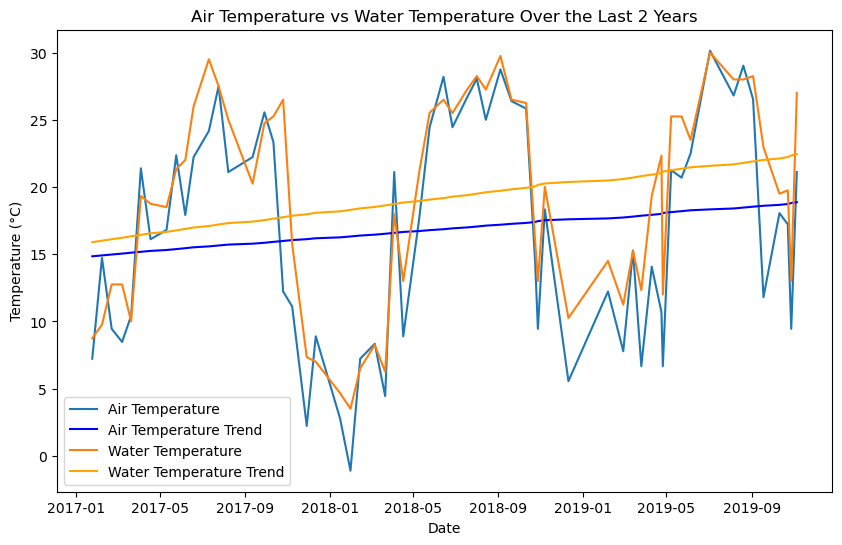

In [57]:
import numpy as np
from scipy import stats

# Filter the last 2 years data
last_2_years = df_dropped_grouped.loc[df_dropped_grouped.index.year >= df_dropped_grouped.index.max().year - 2]

plt.figure(figsize=(10, 6))

# Plot Air Temperature
plt.plot(last_2_years.index, last_2_years['AirTemp (C)'], label='Air Temperature')

# Calculate and plot trend line for Air Temperature
x = np.array(range(len(last_2_years.index)))
y = last_2_years['AirTemp (C)'].values
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
plt.plot(last_2_years.index, intercept + slope * x, label='Air Temperature Trend', color='blue')

# Plot Water Temperature
plt.plot(last_2_years.index, last_2_years['Water Temp (?C)'], label='Water Temperature')

# Calculate and plot trend line for Water Temperature
y = last_2_years['Water Temp (?C)'].values
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
plt.plot(last_2_years.index, intercept + slope * x, label='Water Temperature Trend', color='orange')

plt.title('Air Temperature vs Water Temperature Over the Last 2 Years')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()

plt.show()

In [ ]:
#This shows evidence for climate change as there is a steady increase in air temperature and water temperature. 

In [76]:
%%ai gpt4 -f code

plot the change in Ph per year using the df_dropped dataframe over the last ten years

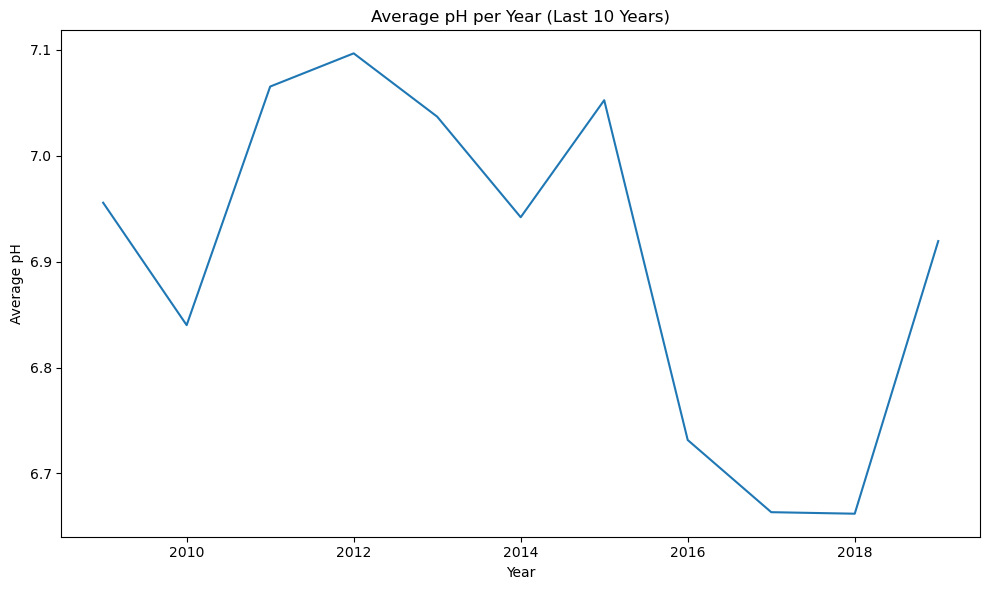

In [79]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Extract year from date
df_dropped['Year'] = df_dropped.index.year

# Filter data for the last ten years
end_date = df_dropped['Year'].max()
start_date = end_date - 10
df_filtered = df_dropped.loc[(df_dropped['Year'] >= start_date) & (df_dropped['Year'] <= end_date)]

# Grouping data by year and calculating mean pH
year_ph = df_filtered.groupby('Year')['pH (standard units)'].mean()

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))

year_ph.plot(kind='line', ax=ax)

ax.set_title('Average pH per Year (Last 10 Years)')
ax.set_xlabel('Year')
ax.set_ylabel('Average pH')

plt.tight_layout()
plt.show()

In [80]:
%%ai gpt4 -f code

plot the change in salinity per year using the df_dropped dataframe over the last ten years

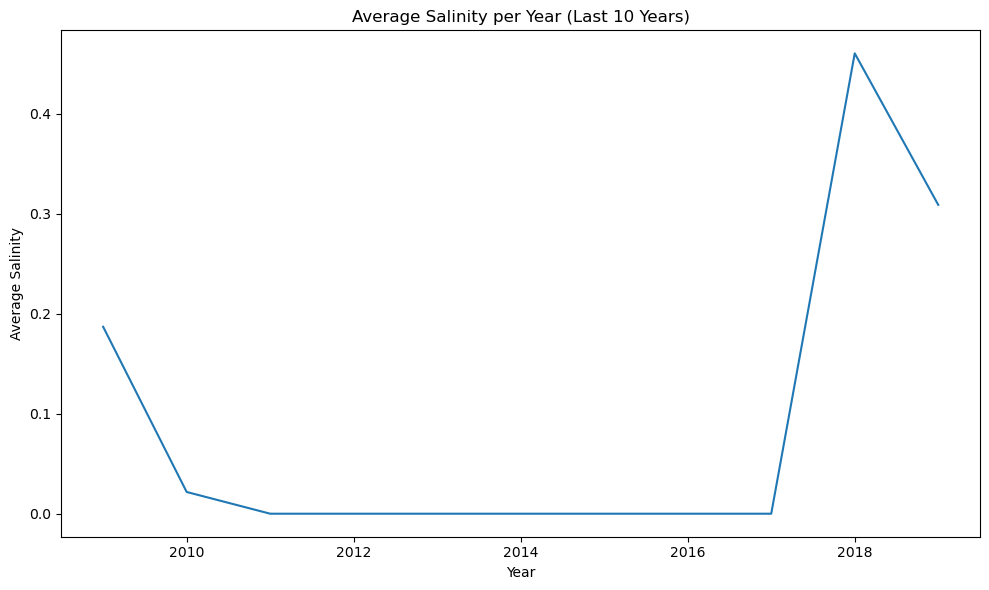

In [83]:
import matplotlib.pyplot as plt

# Assuming 'Salinity' is a column in the dataframe
# Grouping data by year and calculating mean Salinity
year_salinity = df_filtered.groupby('Year')['Salinity (ppt)'].mean()

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))

year_salinity.plot(kind='line', ax=ax)

ax.set_title('Average Salinity per Year (Last 10 Years)')
ax.set_xlabel('Year')
ax.set_ylabel('Average Salinity')

plt.tight_layout()
plt.show()

In [84]:
%%ai gpt4 -f code

plot the change in dissolved oxygen per year using the df_dropped dataframe over the last ten years

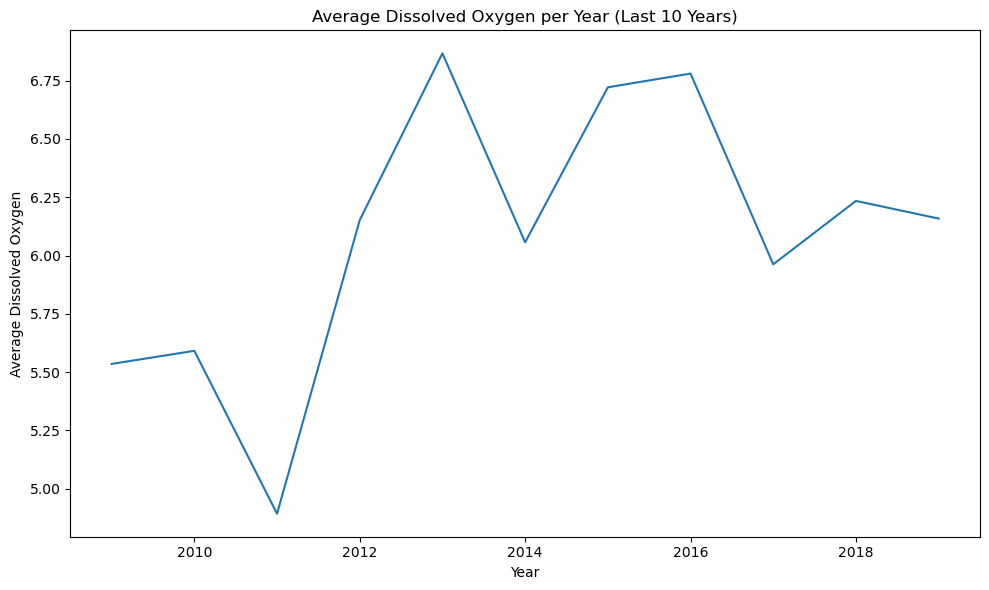

In [87]:
import matplotlib.pyplot as plt

# Assuming 'Dissolved_Oxygen' is a column in the dataframe
# Grouping data by year and calculating mean Dissolved Oxygen
year_dissolved_oxygen = df_filtered.groupby('Year')['Dissolved Oxygen (mg/L)'].mean()

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))

year_dissolved_oxygen.plot(kind='line', ax=ax)

ax.set_title('Average Dissolved Oxygen per Year (Last 10 Years)')
ax.set_xlabel('Year')
ax.set_ylabel('Average Dissolved Oxygen')

plt.tight_layout()
plt.show()

In [88]:
%%ai gpt4 -f code

plot the change in water temperature per year using the df_dropped dataframe over the last ten years

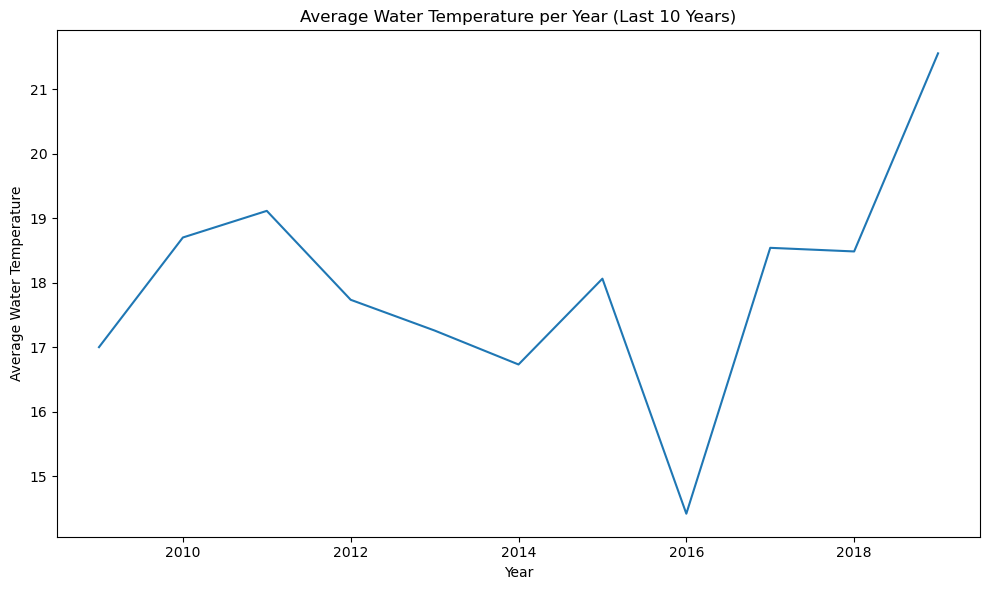

In [89]:
import matplotlib.pyplot as plt

# Assuming 'Water_Temperature' is a column in the dataframe
# Grouping data by year and calculating mean Water Temperature
year_water_temp = df_filtered.groupby('Year')['Water Temp (?C)'].mean()

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))

year_water_temp.plot(kind='line', ax=ax)

ax.set_title('Average Water Temperature per Year (Last 10 Years)')
ax.set_xlabel('Year')
ax.set_ylabel('Average Water Temperature')

plt.tight_layout()
plt.show()

In [101]:
%%ai gpt4 -f code 

given the four plots above is there a to combine them into one plot 




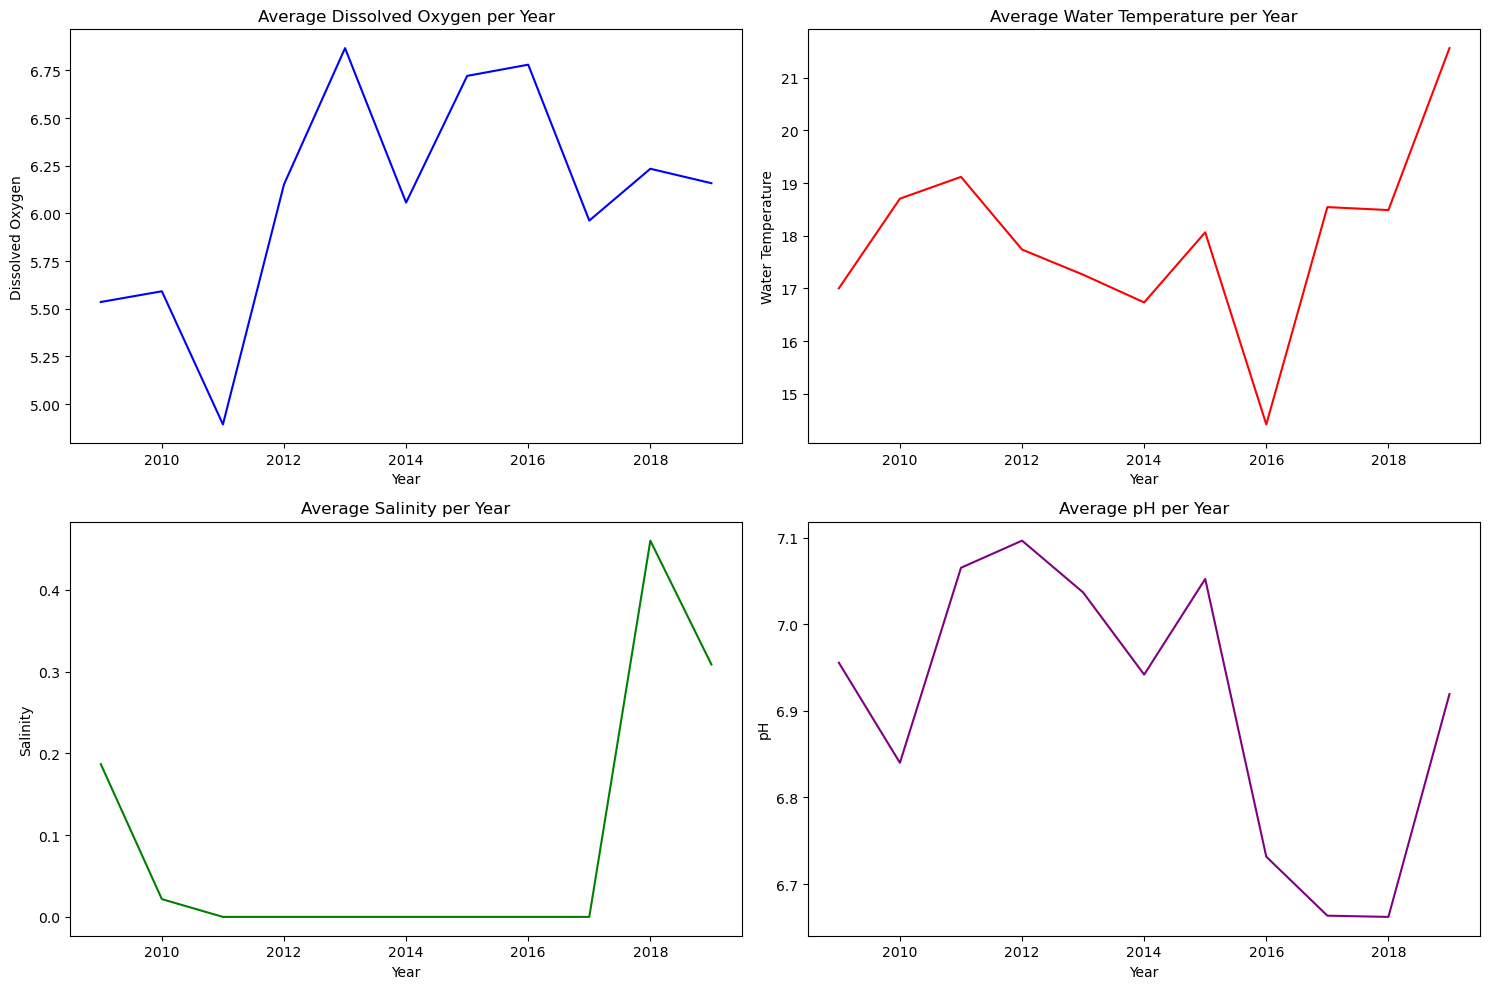

In [107]:
import matplotlib.pyplot as plt

# Assuming 'Dissolved_Oxygen', 'Water_Temperature', 'Salinity' and 'pH' are columns in the dataframe
# Grouping data by year and calculating mean of each parameter
year_dissolved_oxygen = df_filtered.groupby('Year')['Dissolved Oxygen (mg/L)'].mean()
year_water_temp = df_filtered.groupby('Year')['Water Temp (?C)'].mean()
year_salinity = df_filtered.groupby('Year')['Salinity (ppt)'].mean()
year_pH = df_filtered.groupby('Year')['pH (standard units)'].mean()

# Creating subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Plotting each parameter
ax1.plot(year_dissolved_oxygen, color='blue')
ax1.set_title('Average Dissolved Oxygen per Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Dissolved Oxygen')

ax2.plot(year_water_temp, color='red')
ax2.set_title('Average Water Temperature per Year')
ax2.set_xlabel('Year')
ax2.set_ylabel('Water Temperature')

ax3.plot(year_salinity, color='green')
ax3.set_title('Average Salinity per Year')
ax3.set_xlabel('Year')
ax3.set_ylabel('Salinity')

ax4.plot(year_pH, color='purple')
ax4.set_title('Average pH per Year')
ax4.set_xlabel('Year')
ax4.set_ylabel('pH')

# Adjusting the space between plots
plt.tight_layout()
plt.show()

We used AI to create four different graphs of ecosystem parameters in order to show the health of the ecoystem and then lastly we used AI to combine the four graphs into one plot. 

